# Import Package

In [ ]:
# Downgrade pandas
!pip install pandas==1.1.3
!pip install pystan==2.19.1.1
!pip install fbprophet 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 7.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 68 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638378 sha256=bd8677ce0584f2f11c5987c7a44d44c04f7735cd656e379fc101ab8ba93e9944
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492f

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Import numpy để thực hiện phép tính
import numpy as np
# Import pandas để nhập và xử lý dữ liệu
import pandas as pd
# Import pyplot để thực hiện xử lý plot đồ thị
import matplotlib.pyplot as plt

import time
import math
import datetime


# Import widgets 
from ipywidgets import widgets, interactive, interact
import ipywidgets as widgets
from IPython.display import display

# Import các hàm làm tròn số
from math import log, floor

# Import thuật toán KDTree để tìm dữ liệu liên quan
from sklearn.neighbors import KDTree

# Import seaborn để vẽ đồ hoạ thống kê
import seaborn as sns
sns.set_style('whitegrid')

# Import plotly để vẽ đồ thị
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Import pywt để tính wavelet transform
import pywt
from statsmodels.robust import mad

# Import scipy - thư viện khoa học
import scipy
from scipy import signal

# Import statsmodels để sử dụng các thuật toán phân tích dữ liệu thống kê
import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

# Import itertools để sử dụng vòng lặp phức tạp
import itertools
from itertools import cycle
plt.style.use('seaborn')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Import dữ liệu từ file

In [ ]:
# Nhập dữ liệu
calendar_df     = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/calendar.csv')
train_sales_df  = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/sales_train_validation.csv')
sell_prices_df  = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/sell_prices.csv')
submission_file = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/sample_submission.csv')

In [ ]:
# Kiểm tra dữ liệu đã nhập
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [ ]:
# Kiểm tra 3 dòng đầu của data đã nhập
calendar_df.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0


# Tổng hợp dữ liệu

In [ ]:
# Lấy tập hợp các cột ngày của sales_train_valdation (d_1 tới d_1913)
d_cols = [c for c in train_sales_df.columns if 'd_' in c]

# Lấy tổng, trung bình và trung bị của doanh số từng sản phẩm qua tất cả các ngày
train_sales_df['total_sales_all_days'] = train_sales_df[d_cols].sum(axis = 1)
train_sales_df['avg_sales_all_days'] = train_sales_df[d_cols].mean(axis = 1)
train_sales_df['median_sales_all_days'] = train_sales_df[d_cols].median(axis = 1)

In [ ]:
train_sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales_all_days,avg_sales_all_days,median_sales_all_days
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,3,0,1,1,600,0.313643,0.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,493,0.257710,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,1,1,288,0.150549,0.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,4,1,0,1,3,7,2,3288,1.718766,1.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,2,2,2,4,1849,0.966545,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,0,0,1,0,0,1,1022,0.534239,0.0
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,1,0,720,0.376372,0.0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,0,1,0,0,1,0,1712,0.894929,0.0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,3,1,3,702,0.366963,0.0


In [ ]:
# Tạo thêm cột ngày và kết hợp tên cho những ngày có 2 event
calendar_df['days'] = [d.split('-')[2] for d in calendar_df['date']]
calendar_df['events_names'] = pd.concat([calendar_df['event_name_1'], calendar_df['event_name_2']], 
                                        ignore_index=True)
calendar_df['events_types'] = pd.concat([calendar_df['event_type_1'], calendar_df['event_type_2']], 
                                        ignore_index=True)

In [ ]:
calendar_df

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,days,events_names,events_types
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,29,NaN,NaN
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,30,NaN,NaN
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,31,NaN,NaN
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,01,NaN,NaN
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1,15,NaN,NaN
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0,16,NaN,NaN
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0,17,NaN,NaN
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0,18,NaN,NaN


In [ ]:
# Phân nhóm doanh số các sản phẩm theo id, cat_id và store_id
# Tính tổng
# Sắp xếp theo thứ tự giảm dần
df_agg = train_sales_df.groupby(['id', 'cat_id', 'store_id'])['total_sales_all_days'].sum()\
              .sort_values(ascending=False)

# Tổng hợp dữ liệu vào DataFrame              
df_agg = pd.DataFrame(df_agg)
df_agg = df_agg.reset_index()

# Lấy ra top 3 của data theo cột
list(df_agg.loc[df_agg['cat_id'] == 'FOODS']['id'][:3])
list(df_agg.loc[df_agg['cat_id'] == 'HOUSEHOLDS']['id'][:3])
list(df_agg.loc[df_agg['cat_id'] == 'HOBBIES']['id'][:3])

['HOBBIES_1_234_CA_3_validation',
 'HOBBIES_1_348_CA_1_validation',
 'HOBBIES_1_371_CA_1_validation']

# Phân tích dữ liệu và vẽ đồ thị

In [ ]:
# Group các sản phẩm theo cat_id, tính tổng từng cat_id và xếp vào cột "total_entries"
df = train_sales_df.groupby(['cat_id'])['id'].count().reset_index(name='total_entries')
df

,cat_id,total_entries
0,FOODS,14370
1,HOBBIES,5650
2,HOUSEHOLD,10470


In [ ]:
# Vẽ biểu đồ tròn cho data vừa tổng hợp được
fig = px.pie(df, values='total_entries', names='cat_id', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450, title = 'Distribution of Product_IDs Across Categories')
fig.show()

# Tạo chức năng vẽ đồ thị

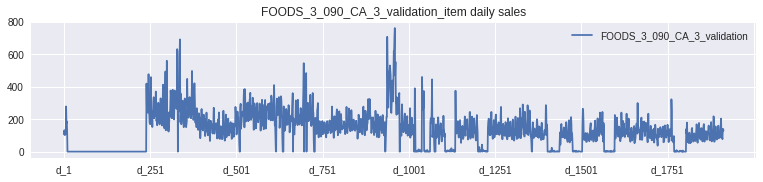

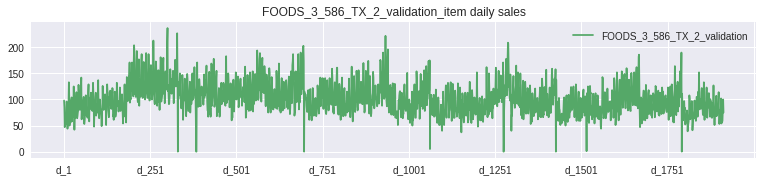

In [ ]:
def plot_dailysales(spec_id):
    """
    plots the behavior of dailysales of specific ids i.e. spec_id
    Vẽ đồ thị số sản phẩm bán ra theo từng ngày
    
    input: id sản phẩm
    returns : đồ thị doanh số
    """

    # Tạo data doanh số theo id sản phẩm, thực hiện hoán vị và tạo thành plot đồ thị
    train_sales_df.loc[train_sales_df['id'] == spec_id ].set_index('id')[d_cols]\
                .T\
                .plot(figsize = (13,2.5),
                      title =  str(spec_id)+"_item daily sales", 
                      color = next(color_cycle) )
    
    # Đặt chú thích lên đồ thị
    plt.legend()
    # Show đồ thị
    plt.show()

# Chạy chức năng vẽ cho 2 sản phẩm có ID như bên dưới
plot_dailysales('FOODS_3_090_CA_3_validation') 
plot_dailysales('FOODS_3_586_TX_2_validation')

# Kiểm tra tính cố định của Time Series

In [ ]:
# Merge dữ liệu ngày vào dữ liệu doanh số
train_sales_cal_df = train_sales_df.set_index('id')[d_cols]\
                                  .T\
                                  .merge(calendar_df.set_index('d')['date'], 
                                          left_index=True, right_index=True,
                                          validate="1:1")
train_sales_cal_df['avg_sales'] = train_sales_cal_df.mean(axis=1, numeric_only=True)

In [ ]:
train_sales_cal_df

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation,date,avg_sales
d_1,0,0,0,0,0,0,0,12,2,0,...,1,0,4,0,0,0,0,0,2011-01-29,1.070220
d_2,0,0,0,0,0,0,0,15,0,0,...,1,0,4,0,0,6,0,0,2011-01-30,1.041292
d_3,0,0,0,0,0,0,0,0,7,1,...,1,0,2,2,0,0,0,0,2011-01-31,0.780026
d_4,0,0,0,0,0,0,0,0,3,0,...,1,0,5,2,0,2,0,0,2011-02-01,0.833454
d_5,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,2,0,0,2011-02-02,0.627944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,1,1,1,0,1,0,1,4,0,0,...,1,0,0,0,0,1,1,0,2016-04-20,1.159167
d_1910,3,0,0,1,2,0,0,6,0,0,...,3,0,2,1,0,0,0,0,2016-04-21,1.149000
d_1911,0,0,1,3,2,2,0,3,0,2,...,6,0,3,0,0,0,3,0,2016-04-22,1.328862
d_1912,1,0,1,7,2,0,1,2,0,0,...,0,4,2,0,1,1,1,0,2016-04-23,1.605838


In [ ]:
# Đổi cột date thành index
train_sales_cal_df = train_sales_cal_df.reset_index()
train_sales_cal_df.rename(columns={'index': 'daysnum'}, inplace=True)
train_sales_cal_df = train_sales_cal_df.set_index('date').asfreq('d')

train_sales_cal_df.head(5)

,daysnum,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation,avg_sales
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,d_1,0,0,0,0,0,0,0,12,2,...,14,1,0,4,0,0,0,0,0,1.070220
2011-01-30,d_2,0,0,0,0,0,0,0,15,0,...,11,1,0,4,0,0,6,0,0,1.041292
2011-01-31,d_3,0,0,0,0,0,0,0,0,7,...,5,1,0,2,2,0,0,0,0,0.780026
2011-02-01,d_4,0,0,0,0,0,0,0,0,3,...,6,1,0,5,2,0,2,0,0,0.833454
2011-02-02,d_5,0,0,0,0,0,0,0,0,0,...,5,1,0,2,0,0,2,0,0,0.627944


In [ ]:
# Đổi index sang kiểu dữ liệu "datetime"
train_sales_cal_df.index = pd.to_datetime(train_sales_cal_df.index)
type(train_sales_cal_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
# Tạo chức năng vẽ đồ thị time series
def time_series_stationary_test(df):
    
    '''
    Vẽ đồ thị time series
    
    inputs: data dạng time series
    
    returns : time_series plot, rolling_mean plot, std_plot và Dickey_Fuller Test Statistics
    '''
    
    # Khởi tạo đồ thị
    sns.set_style("whitegrid")
    fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))
    
    # Lấy trung bình và độ lệch chuẩn của 7 ngày liên tiếp
    rolling_mean = df.rolling(window=7).mean()
    rolling_std =  df.rolling(window=7).std()
    
    # Vẽ đồ thị cho doanh số, trung bình và độ lệch chuẩn
    original_series = df.plot(figsize=(15, 5), alpha=1, 
                        lw=1.2, color=next(color_cycle), label='original_series', ax=ax1)
    mean_series = rolling_mean.plot(figsize=(15, 5), alpha=1, 
                        lw=1.2, marker = 'o', color=next(color_cycle), label='rolling_mean', ax=ax1)
    std_series = rolling_std.plot(figsize=(15, 5), alpha=1, 
                        lw=1.2, marker = '*' , color=next(color_cycle), label='rolling_std', ax=ax1)
    
    # Đặt chú thích
    ax1.legend(['Original_Series', 'Mean_Series', "Std_Series"])
    # Vẽ đồ thị
    plt.show()
    
    #Chạy Dickey-Fuller Test
    print("\n============++++==========\n")
    print("Results of the Dickey_Fuller Test")
    result = adfuller(df, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('No of lags: %f' %result[2])
    print('No of Obs used for ADF Calculation & Critical Values: %f' %result[3])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

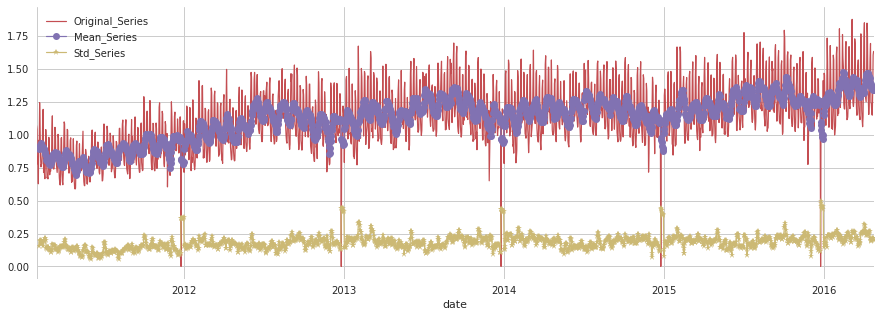


============++++==========

Results of the Dickey_Fuller Test
ADF Statistic: -1.565373
No of lags: 26.000000
No of Obs used for ADF Calculation & Critical Values: 1886.000000
p-value: 0.500960
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
# Chạy chức năng vẽ đồ thị
time_series_stationary_test(train_sales_cal_df[['avg_sales']])

# Cố định Time Series

In [ ]:
# Lấy hiệu doanh thu giữa các ngày và bỏ dòng có giá trị N/A
df_log_diff = np.log(train_sales_cal_df[['avg_sales']]) - np.log(train_sales_cal_df[['avg_sales']]).shift()
df_log_diff = df_log_diff.dropna()
df_log_diff

,avg_sales
date,
2011-01-30,-0.027402
2011-01-31,-0.288890
2011-02-01,0.066250
2011-02-02,-0.283128
2011-02-03,0.422452
...,...
2016-04-20,-0.061106
2016-04-21,-0.008810
2016-04-22,0.145431


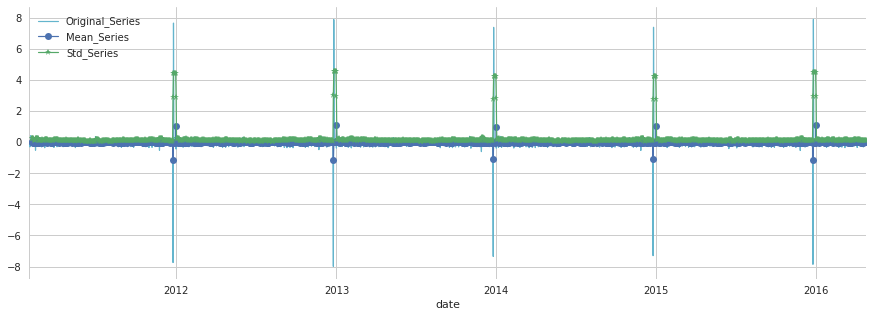


============++++==========

Results of the Dickey_Fuller Test
ADF Statistic: -16.908187
No of lags: 26.000000
No of Obs used for ADF Calculation & Critical Values: 1885.000000
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
# Kiểm tra biểu đồ hiệu số doanh thu
time_series_stationary_test(df_log_diff)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Tạo chức năng decompose time series
def time_series_decompose(df, model_specified, period):
    
    '''
    Trả về đồ thị biến động tăng dần đều, theo chu kì và biến động còn sót lại
    
    inputs: df cho time series,
            loại model,
            chu kì
    returns: đồ thị biến động tăng dần đều, theo chu kì và biến động sót lại
    '''

    # Lấy data decompose
    df_decomposition = seasonal_decompose(
                               x=df, 
                               model= model_specified, 
                               period=period)
    
    # Đặt biến động tăng dần đều
    est_trend = df_decomposition.trend
    est_trend = est_trend.reset_index(name='trend').set_index('date')
    # Đặt biến động theo chu kì
    est_seasonal = df_decomposition.seasonal
    est_seasonal = est_seasonal.reset_index(name='seasonal').set_index('date')
    # Đặt biến động còn sót lại
    est_residual = df_decomposition.resid
    est_residual = est_residual.reset_index(name='resid').set_index('date')
    
    # Khởi tạo đồ thị
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 24))

    # Thiết kế cho từng đồ thị
    df.plot(figsize=(14, 8) ,
                 alpha=0.8, 
                 lw=1.5, ax = ax1)
    est_trend.plot(figsize=(14, 8) ,
                 alpha=0.8, 
                 lw=1.5, ax = ax2)
    est_seasonal.plot(figsize=(14, 8) ,
                 alpha=0.8, 
                 lw=1.5, ax = ax3)
    est_residual.plot(figsize=(14, 8) ,
                 alpha=0.6, 
                 lw=3, style = 'o', ax = ax4)

    # Hiển thị đồ thị
    fig.tight_layout()
    plt.show()
    
    # Trả về kết quả
    return est_trend, est_seasonal, est_residual

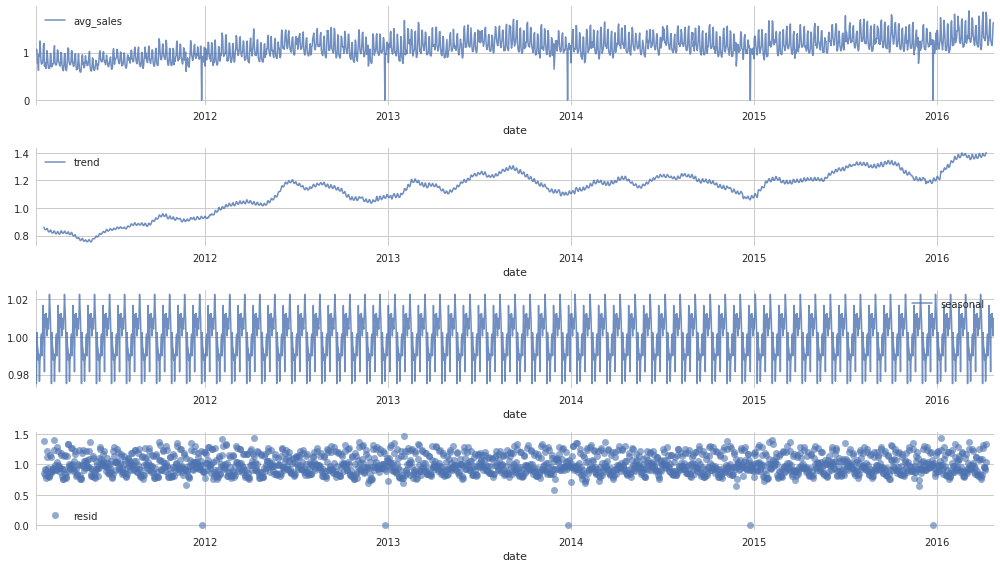

In [ ]:
# Chạy chức năng
trend_comp, seas_comp, residual_comp = time_series_decompose(train_sales_cal_df[['avg_sales']], 'multiplicative', 30)

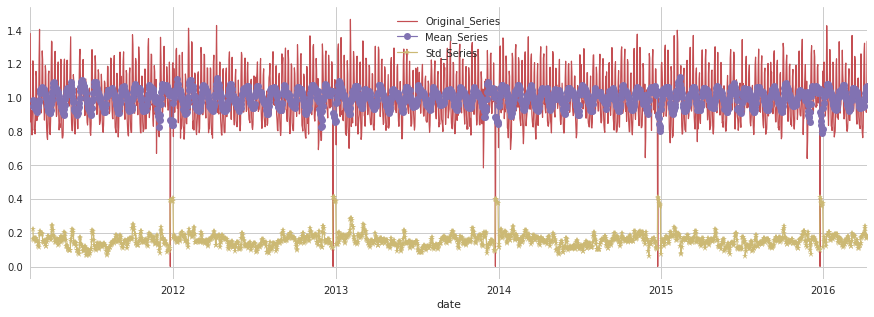


============++++==========

Results of the Dickey_Fuller Test
ADF Statistic: -26.316735
No of lags: 25.000000
No of Obs used for ADF Calculation & Critical Values: 1857.000000
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
# Vẽ đồ thị time series cho biến động còn sót lại
residual_comp = residual_comp.dropna()
time_series_stationary_test(residual_comp)

# Áp dụng SARIMAX

In [ ]:
# Import package tính hệ số tự tương quan ACF - PACF
from statsmodels.tsa.stattools import acf, pacf

# Tạo chức năng vẽ đồ thị ACF và PACF cho Time series
def auto_par_corr(ts_stat, nlags=25): 

    '''
    inputs: ts_stat (data time series), nlags (hệ số lag tối ưu)
    
    returns: đồ thị ACF và PACF
    '''

    # Tính lag cho ACF và PACF
    lag_acf = acf(ts_stat, nlags)
    lag_pacf = pacf(ts_stat, nlags, method='ols')
    
    # Khởi tạo đồ thị
    sns.set_style("whitegrid")

    # Thiết kế đồ thị
    plt.figure(figsize=(15, 8))
    plt.subplot(121)
    #plt.plot(lag_acf)
    plt.stem(lag_acf)
    plt.axhline(y=0,linestyle='--',color='g')
    plt.axhline(y=-1.96/np.sqrt(len(ts_stat)), linestyle='--',color='r')
    plt.axhline(y=1.96/np.sqrt(len(ts_stat)), linestyle='--',color='r')
    plt.title('Auto-Correlation')
    
    plt.subplot(122)
    plt.stem(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='g')
    plt.axhline(y=-1.96/np.sqrt(len(ts_stat)), linestyle='--',color='r')
    plt.axhline(y=1.96/np.sqrt(len(ts_stat)), linestyle='--',color='r')
    plt.title('Partial Auto-Correlation')
    
    # Hiển thị chú thích và đồ thị
    plt.legend()
    plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be adde

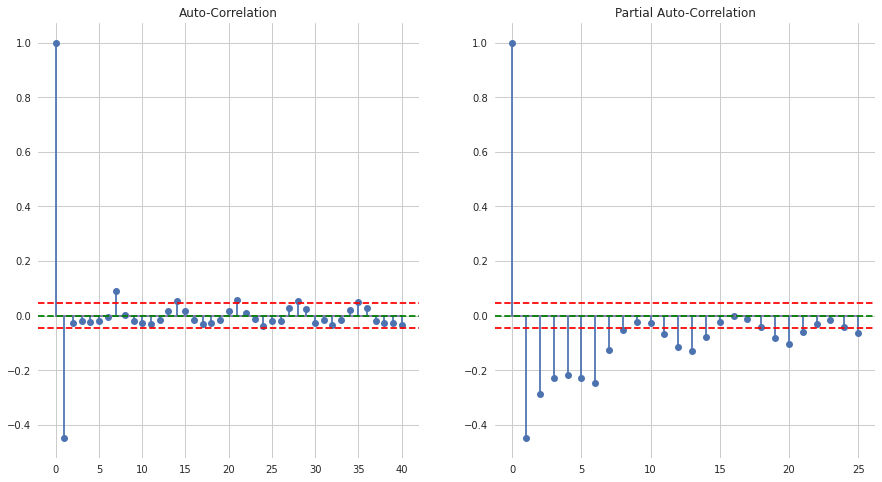

In [ ]:
# Chạy chức năng
auto_par_corr(df_log_diff, nlags=25)

In [ ]:
# Lấy doanh số và dự đoán cho 2 tập data: trước và sau 14/10/2015
training_p = train_sales_cal_df.loc[:'2015-10-14', ['avg_sales']]
testing_p = train_sales_cal_df.loc['2015-10-15':, ['avg_sales']]
training_p.head(2)

avg_sales    1720
dtype: int64

In [ ]:
# Tạo data frame cho danh sách các ngày có event và SNAP
df_event_1 = pd.DataFrame({'holiday': 'Event 1', 'ds': calendar_df[~calendar_df['event_name_1'].isna()]['date']})
df_event_2 = pd.DataFrame({'holiday': 'Event 2', 'ds': calendar_df[~calendar_df['event_name_2'].isna()]['date']})
df_snapca = pd.DataFrame({'holiday': 'snap_CA', 'ds': calendar_df[calendar_df['snap_CA'] == 1]['date']})
df_snaptx = pd.DataFrame({'holiday': 'snap_TX', 'ds': calendar_df[calendar_df['snap_TX'] == 1]['date']})
df_snapwi = pd.DataFrame({'holiday': 'snap_WI', 'ds': calendar_df[calendar_df['snap_WI'] == 1]['date']})
holidays = pd.concat((df_event_1, df_event_2, df_snapca, df_snaptx, df_snapwi))
holidays.head(3)

,holiday,ds
8,Event 1,2011-02-06
16,Event 1,2011-02-14
23,Event 1,2011-02-21


In [ ]:
# Convert thành dữ liệu datetime
holidays['ds'] = pd.to_datetime(holidays['ds'])

In [ ]:
# for SARIMAX Model:

data = {'date':train_sales_cal_df.index,
        'holidays': 0 }

exo = pd.DataFrame(data)

for idx, date1 in enumerate(exo['date']):
    for date2 in holidays['ds']:
        if date2 == date1:
            exo['holidays'].iloc[idx] = 1
        else:
            continue       